In [ ]:
#SALES ANALYSIS
#1 DATA WRANGLING

In [ ]:
#Inspect the data manually for missing/incorrect data using the functions isna() and notna()

In [123]:
import pandas as pd
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [125]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [27]:
df.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [29]:
df.notna()

,Date,Time,State,Group,Unit,Sales
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
7555,True,True,True,True,True,True
7556,True,True,True,True,True,True
7557,True,True,True,True,True,True
7558,True,True,True,True,True,True


In [46]:
#Based on your knowledge of Data Analytics, include your recommendation for treating missing data and incorrect data. (dropping the null values or filling them)

df.fillna(df[['Unit','Sales']].mean())

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [73]:
#●Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)
import numpy as np
if 'Sales' in df.columns:
    df['Normalized_Sales'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
    print(df)
else :
 print('The Sales is not exists')

             Date        Time State     Group  Unit  Sales  Normalized_Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000          0.095238
1      1-Oct-2020     Morning    WA       Men     8  20000          0.095238
2      1-Oct-2020     Morning    WA     Women     4  10000          0.031746
3      1-Oct-2020     Morning    WA   Seniors    15  37500          0.206349
4      1-Oct-2020   Afternoon    WA      Kids     3   7500          0.015873
...           ...         ...   ...       ...   ...    ...               ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000          0.190476
7556  30-Dec-2020     Evening   TAS      Kids    15  37500          0.206349
7557  30-Dec-2020     Evening   TAS       Men    15  37500          0.206349
7558  30-Dec-2020     Evening   TAS     Women    11  27500          0.142857
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500          0.174603

[7560 rows x 7 columns]


In [105]:
#Share your recommendation on the usage of the groupby() function for data chunking or merging.
df = pd.DataFrame({'Group':df['Group'],'Sales':df['Sales']})
df_aggregated = df.groupby('Group').mean()
print('Aggregated data from the excel')
print(df_aggregated)

Aggregated data from the excel
                 Sales
Group                 
 Kids     45011.904762
 Men      45370.370370
 Seniors  44464.285714
 Women    45207.671958


In [ ]:
#

In [ ]:
# 2.Data Analysis

In [114]:
#Perform descriptive statistical analysis on the data (Sales and Unit columns) 
#(Techniques such as mean, median, mode and standard deviation can be used.).
df.describe()

,Sales
count,7560.000000
mean,45013.558201
std,32253.506944
min,5000.000000
25%,20000.000000
50%,35000.000000
75%,65000.000000
max,162500.000000


In [139]:
#Determine which group is generating the highest sales, and which group is generating the lowest sales.
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df = pd.DataFrame({'Group':df['Group'],'Sales':df['Sales']})
df_agg = df.groupby('Group').mean()
print("highest sales ",df_agg.idxmax() ,df_agg.max())

df_agg_low = df.groupby('Group').mean()
print('Lowest Sale', df_agg_low.idxmin(), df_agg_low.min() )


highest sales  Sales     Men
dtype: object Sales    45370.37037
dtype: float64
Lowest Sale Sales     Seniors
dtype: object Sales    44464.285714
dtype: float64


In [159]:
#Determine which state is generating the highest sales, and which state is generating the lowest sales.
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df = pd.DataFrame({'State':df['State'],'Sales':df['Sales']})
df_agg = df.groupby('State').mean()
print("Higest Sales ", df_agg.idxmax(), df_agg.max())

df_agg_low = df.groupby('State').mean()
print("Lowest Sale ",df_agg_low.idxmin(), df_agg.min())

Higest Sales  Sales     VIC
dtype: object Sales    97745.37037
dtype: float64
Lowest Sale  Sales     WA
dtype: object Sales    20511.574074
dtype: float64


In [218]:
#Generate weekly, monthly and quarterly reports for the analysis made.
#(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df['Date'] = pd.to_datetime(df['Date'])
min_dt = df['Date'].min()
max_dt = df['Date'].max()
print(min_dt)
print(max_dt)
date_range_w =  pd.date_range(start=min_dt, end=max_dt, freq='W')
date_range_m =  pd.date_range(start=min_dt, end=max_dt, freq='M')
date_range_q =  pd.date_range(start=min_dt, end=max_dt, freq='Q')
print('Weekly Date range ',date_range_w)
print('Weekly Date monthly ',date_range_m)
print('Weekly Date quarterly ',date_range_q)

2020-10-01 00:00:00
2020-12-30 00:00:00
Weekly Date range  DatetimeIndex(['2020-10-04', '2020-10-11', '2020-10-18', '2020-10-25',
               '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22',
               '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20',
               '2020-12-27'],
              dtype='datetime64[ns]', freq='W-SUN')
Weekly Date monthly  DatetimeIndex(['2020-10-31', '2020-11-30'], dtype='datetime64[ns]', freq='M')
Weekly Date quarterly  DatetimeIndex([], dtype='datetime64[ns]', freq='Q-DEC')


In [222]:
#

In [224]:
#3.Data Visualization

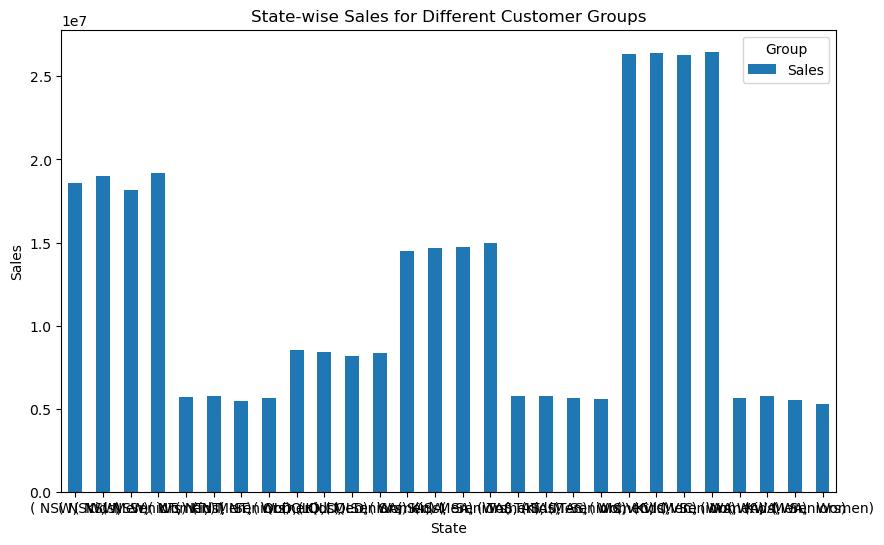

In [264]:
#Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
#State-wise sales analysis for different groups (kids, women, men, and seniors) 

#Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?
#[This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].
#The dashboard must contain daily, weekly, monthly and quarterly charts.
# (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)
import matplotlib.pyplot as plt
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df = pd.DataFrame(df)
group_data = df.groupby(['State','Group'])['Sales'].sum()
#print(group_data)
group_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('State-wise Sales for Different Customer Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.xticks(rotation=0)
plt.show()

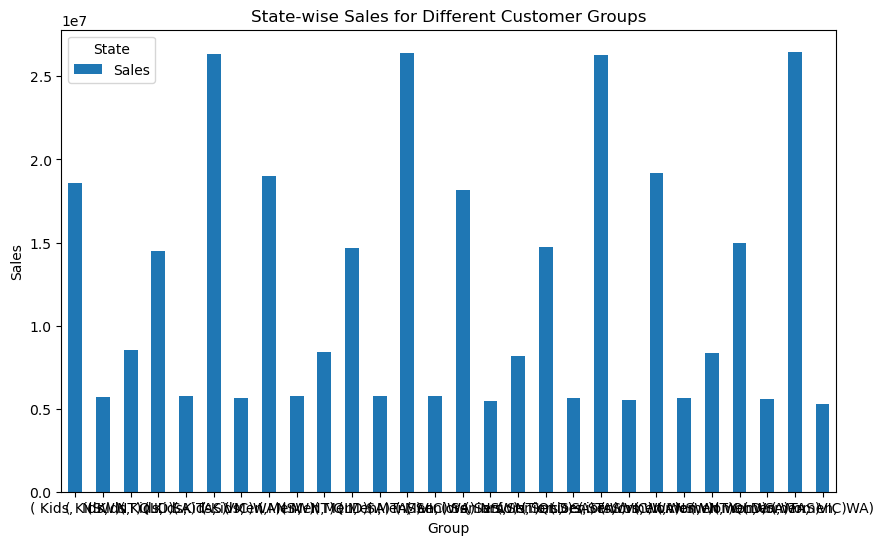

In [269]:
#Group-wise sales analysis (kids, women, men, and seniors) across different states.
import matplotlib.pyplot as plt
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df = pd.DataFrame(df)
group_data = df.groupby(['Group','State'])['Sales'].sum()
#print(group_data)
group_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('State-wise Sales for Different Customer Groups')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.xticks(rotation=0)
plt.show()